In [39]:
import pandas as pd
import matplotlib.pyplot as plt 
from matplotlib.cbook import boxplot_stats

In [2]:
orders = pd.read_csv('orders.csv')

# 3. Чи є у закладу пікові години?

In [16]:
# convert time to hour
orders['hour'] = [i.split(':')[0] for i in list(orders['time'])]

In [41]:
result = orders.groupby(['hour', 'date'])['order_id'].size().reset_index(name='count')

In [70]:
result.head(5)

,hour,date,count
0,09,2015-11-24,1
1,10,2015-02-25,1
2,10,2015-03-30,1
3,10,2015-04-04,1
4,10,2015-05-07,1


In [82]:
result_fin = result.groupby(['hour']).agg({'count': 'sum', 'date': 'size'})
result_fin['avg_count'] = result_fin['count']/result_fin['date']
result_fin.head(5)

,count,date,avg_count
hour,,,
09,1,1,1.000000
10,8,8,1.000000
11,1231,331,3.719033
12,2520,357,7.058824
13,2455,358,6.857542


No handles with labels found to put in legend.


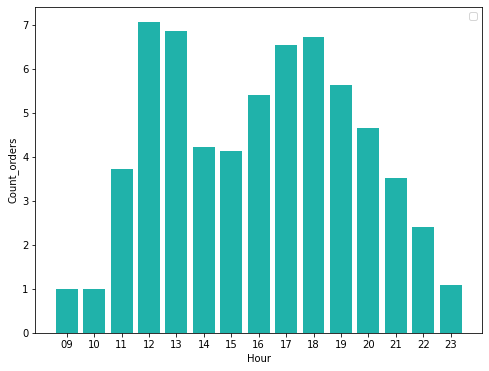

In [96]:
plt.figure(figsize=(8, 6))
plt.bar(result_fin.index.tolist(), result_fin['avg_count'], color='lightseagreen')
plt.xlabel('Hour')
plt.ylabel('Count_orders')
plt.legend()
plt.show()

In [ ]:
# але повернемось до датасету result, як бачимо з графіку там наявні викиди

{'whiskers': [<matplotlib.lines.Line2D at 0x7f8a4814bfd0>,
 'caps': [<matplotlib.lines.Line2D at 0x7f8a48165670>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f8a4814bca0>],
 'medians': [<matplotlib.lines.Line2D at 0x7f8a48165d90>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f8a48172160>],
 'means': []}

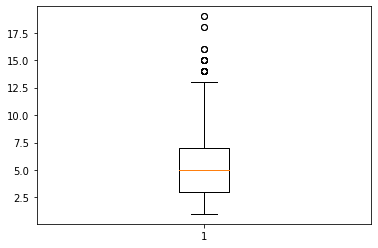

In [42]:
plt.boxplot(result['count'])

In [83]:
outliers = boxplot_stats(result['count']).pop(0)['fliers']
print(outliers)

[14 14 15 14 14 14 16 14 14 15 15 16 19 15 15 14 15 18 16 14 18 14 14 15
 14 14 19 14]


In [74]:
result_pro = result[~result['count'].isin(outliers)]
result_pro.head(5)

In [84]:
result_fin_pro = result_pro.groupby(['hour']).agg({'count': 'sum', 'date': 'size'})
result_fin_pro['avg_count'] = result_fin_pro['count']/result_fin_pro['date']
result_fin_pro.head(5)

,count,date,avg_count
hour,,,
09,1,1,1.000000
10,8,8,1.000000
11,1231,331,3.719033
12,2391,348,6.870690
13,2390,354,6.751412


No handles with labels found to put in legend.


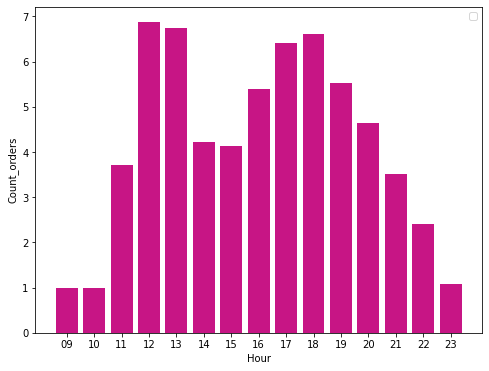

In [101]:
plt.figure(figsize=(8, 6))
plt.bar(result_fin_pro.index.tolist(), result_fin_pro['avg_count'], color='mediumvioletred')
plt.xlabel('Hour')
plt.ylabel('Count_orders')
plt.legend()
plt.show()

In [85]:
# як бачимо навіть без викидів, графік майже не змінився

### Отже, найбільш пікові години в закладі в обід ( з 12 по 13) і ввечері (з 17 по 18). А от найменше замовлень вранці (до 11) та пізно ввечері (після 22). Невеликий спад також спостерігається з 14 по 15 годину дня.

# 4. Чи існує певна сезонна кореляція продажів?

In [86]:
# подивимось дані помісячно та потижнево

In [89]:
orders['month'] = [int(i.split('-')[1]) for i in list(orders['date'])]
orders['date'] = pd.to_datetime(orders['date'])
orders['week'] = orders['date'].dt.week

In [93]:
orders.head()

,order_id,date,time,hour,month,week
0,1,2015-01-01,11:38:36,11,1,1
1,2,2015-01-01,11:57:40,11,1,1
2,3,2015-01-01,12:12:28,12,1,1
3,4,2015-01-01,12:16:31,12,1,1
4,5,2015-01-01,12:21:30,12,1,1


In [ ]:
# помісячно

In [94]:
month_pre = orders.groupby(['month', 'date'])['order_id'].size().reset_index(name='count')
month = month_pre.groupby(['month']).agg({'count': 'sum', 'date': 'size'})
month['avg_count'] = month['count']/month['date']
month.head(5)

,count,date,avg_count
month,,,
1,1845,31,59.516129
2,1685,28,60.178571
3,1840,31,59.354839
4,1799,30,59.966667
5,1853,31,59.774194


No handles with labels found to put in legend.


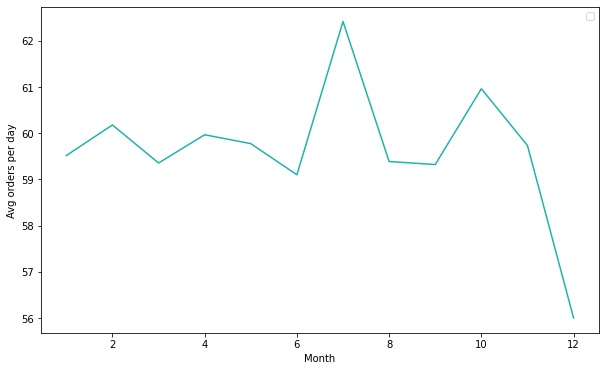

In [106]:
plt.figure(figsize=(10, 6))
plt.plot(month.index.tolist(), month['avg_count'], color='lightseagreen')
plt.xlabel('Month')
plt.ylabel('Avg orders per day')
plt.legend()
plt.show()

In [ ]:
# потижнево

In [99]:
week_pre = orders.groupby(['week', 'date'])['order_id'].size().reset_index(name='count')
week = week_pre.groupby(['week']).agg({'count': 'sum', 'date': 'size'})
week['avg_count'] = week['count']/week['date']
week.head(5)

,count,date,avg_count
week,,,
1,254,4,63.500000
2,427,7,61.000000
3,400,7,57.142857
4,415,7,59.285714
5,436,7,62.285714


No handles with labels found to put in legend.


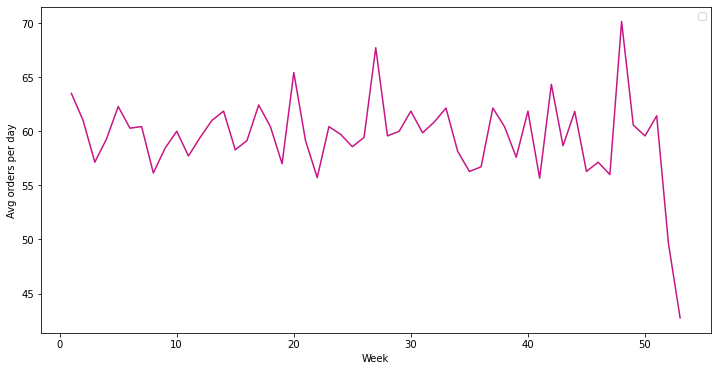

In [105]:
plt.figure(figsize=(12, 6))
plt.plot(week.index.tolist(), week['avg_count'], color='mediumvioletred')
plt.xlabel('Week')
plt.ylabel('Avg orders per day')
plt.legend()
plt.show()

### Як бачимо з графіків певна сезонність дійсно спостерігається, так на липень та жовтень приходяться піки продажів, у той час як в грудні спостерігається сильний спад замовлень.
### Потижнево можна помітити, що найгірше показує себе останні півтора тижні місяця, при цьому початок року показує себе досить непогано. Також певне просідання помітно восени, хоча на листопад приходиться найприбутковіший день.

# 5.Чи варто на вашу думку вилучити певні позиції з меню, і якщо так, то які саме?

In [114]:
order_details = pd.read_csv('order_details.csv')
pizza_types = pd.read_csv('pizza_types1.csv')
pizzas = pd.read_csv('pizzas.csv')

In [110]:
order_details.head(5)

,order_details_id,order_id,pizza_id,quantity
0,1,1,hawaiian_m,1
1,2,2,classic_dlx_m,1
2,3,2,five_cheese_l,1
3,4,2,ital_supr_l,1
4,5,2,mexicana_m,1


#### Для початку, логічно, що немає сенсу відслідковувати різні розміри однієї й тієї ж піци, оскільки позицію або повністю вилучать або не вилучатимуть взагалі. Отже, подивимось в наступних розрізах: pizza_type_id, category і size

In [112]:
pizza_sum = order_details.groupby(['pizza_id']).agg({'order_id': 'size', 'quantity': 'sum'})
pizza_sum.head(5)

,order_id,quantity
pizza_id,,
bbq_ckn_l,967,992
bbq_ckn_m,926,956
bbq_ckn_s,479,484
big_meat_s,1811,1914
brie_carre_s,480,490


In [125]:
name_pizza = pd.merge(pizza_sum, pizzas, on='pizza_id', how='inner')

In [126]:
pizza_data = pd.merge(name_pizza, pizza_types, on='pizza_type_id', how='inner')

In [127]:
pizza_data.head(3)

,pizza_id,order_id,quantity,pizza_type_id,size,price,name,category,ingredients
0,bbq_ckn_l,967,992,bbq_ckn,L,20.75,The Barbecue Chicken Pizza,Chicken,"Barbecued Chicken, Red Peppers, Green Peppers,..."
1,bbq_ckn_m,926,956,bbq_ckn,M,16.75,The Barbecue Chicken Pizza,Chicken,"Barbecued Chicken, Red Peppers, Green Peppers,..."
2,bbq_ckn_s,479,484,bbq_ckn,S,12.75,The Barbecue Chicken Pizza,Chicken,"Barbecued Chicken, Red Peppers, Green Peppers,..."


In [124]:
pizza_size = pizza_data.groupby(['size']).agg({'order_id': 'sum', 'quantity': 'sum'})
pizza_size.head(10)

,order_id,quantity
size,,
L,18526,18956
M,15385,15635
S,14137,14403
XL,544,552
XXL,28,28


In [129]:
pizza_name = pizza_data.groupby(['name']).agg({'order_id': 'sum', 'quantity': 'sum'})
pizza_name.head(100)

,order_id,quantity
name,,
The Barbecue Chicken Pizza,2372,2432
The Big Meat Pizza,1811,1914
The Brie Carre Pizza,480,490
The Calabrese Pizza,927,937
The California Chicken Pizza,2302,2370
The Chicken Alfredo Pizza,980,987
The Chicken Pesto Pizza,961,973
The Classic Deluxe Pizza,2416,2453
The Five Cheese Pizza,1359,1409


In [131]:
pizza_category = pizza_data.groupby(['category']).agg({'order_id': 'sum', 'quantity': 'sum'})
pizza_category.head(10)

,order_id,quantity
category,,
Chicken,10815,11050
Classic,14579,14888
Supreme,11777,11987
Veggie,11449,11649


### За категоріями кількість замовлень майже рівномірна. 
### За видом піцци помітних аутсайдерів також немає.
### Інша ситуація з розміром 'The Greek Pizza' єдина має розміри XL та XXL і якщо XL як для однієї піци працює досить непогано, XXL показує себе набагато гірше, усього 28 покупок за рік, тож цей розмір доречно прибрати